# JOBarcelona 23 | Data Science

# Introducción

Somos un banco que dispone de una base de datos con una gran cantidad de información sobre nuestros clientes. Nuestro objetivo es ayudar a los analistas a **predecir la tasa de abandono** de estos clientes para así poder reducirla. La base de datos incluye información demográfica como la edad, el sexo, el estado civil y la categoría de ingresos. También contiene información sobre el tipo de tarjeta, el número de meses en cartera y los periodos inactivos. Además, dispone de datos clave sobre el comportamiento de gasto de los clientes que se acercan a su decisión de cancelación. Entre esta última información hay el saldo total renovable, el límite de crédito, la tasa media de apertura a la compra y métricas analizables como el importe total del cambio del cuarto trimestre al primero o el índice medio de utilización.

Frente a este conjunto de datos podemos capturar información actualizada que puede determinar la estabilidad de la cuenta a largo plazo o su salida inminente.

# Variables

- `CLIENTNUM`: Id de cada cliente. *Int*
- `Attrition_Flag`: Indicador de si el cliente ha abandonado el banco o se queda *Bool* ( `0` abandonado `1` no) -> **TARGET**
- `Customer_Age`: Edad del cliente. *Int*
- `Gender`: Sexo del cliente. *Str*
- `Dependent_count`: Número de personas a cargo que tiene el cliente. *Int*
- `Education_Level`: Nivel educativo del cliente. *Str*
- `Marital_Status`: Estado civil del cliente. *Str*
- `Income_Category`: Ingresos del cliente. *Str*
- `Card_Category`: Tipo de tarjeta del cliente. *Str*
- `Months_on_book`: El tiempo que el cliente ha estado en los libros. *Int*
- `Total_Relationship_Count`: Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito. *Int*
- `Months_Inactive_12_mon`: Número de meses que el cliente ha estado inactivo en los últimos doce meses. *Int*
- `Contacts_Count_12_mon`: Número de contactos que ha tenido el cliente en los últimos doce meses. *Int*
- `Credit_Limit`: Límite de crédito del cliente. *Int*
- `Total_Revolving_Bal`: Saldo renovable total del cliente. *Int*
- `Avg_Open_To_Buy`: Ratio medio de apertura a la compra del cliente. *Int*
- `Total_Amt_Chng_Q4_Q1`: Importe total cambiado del trimestre 4 al trimestre 1. *Int*
- `Total_Trans_Amt`: Importe total de la transacción. *Int*
- `Total_Trans_Ct`: Recuento total de transacciones. *Int*
- `Total_Ct_Chng_Q4_Q1`: Recuento total cambiado del trimestre 4 al trimestre 1. *Int*
- `Avg_Utilization_Ratio`: Ratio de utilización medio del cliente. *Int*
- `Months_Inactive_12_mon`: Número de meses que el cliente ha estado inactivo en los últimos doce meses. *Int*
- `Contacts_Count_12_mon`: Número de contactos que ha tenido el cliente en los últimos doce meses. *Int*
- `Credit_Limit`: Límite de crédito del cliente. *Int*
- `Total_Revolving_Bal`: Saldo rotativo total del cliente. *Int*
- `Avg_Open_To_Buy`: Ratio medio de apertura a compra del cliente. *Int*
- `Total_Amt_Chng_Q4_Q1`: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)
- `Total_Trans_Amt`: Importe total de la transacción. *Int*
- `Total_Trans_Ct`: Recuento total de transacciones. *Int*
- `Total_Ct_Chng_Q4_Q1`: Recuento total cambiado del trimestre 4 al trimestre 1. *Int*
- `Avg_Utilization_Ratio`: Ratio de utilización medio del cliente. *Int*


> Objetivo
Crea un modelo predictivo de clasificación para poder clasificar los datos del archivo de testing. Primero entrena tu modelo con el conjunto de datos de training y una vez que tengas el modelo que maximice la puntuación f1 (macro.) utiliza los datos de testing como entrada para tu modelo.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd

sns.set_style('darkgrid')

# Importación de los datos

In [2]:
train = pd.read_csv('./train.csv', index_col=[0])
test = pd.read_csv('./test.csv', index_col=[0])

In [3]:
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [4]:
test.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,,
0,719455083,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [5]:
train.Attrition_Flag.value_counts() # DESbalanceada

1    6801
0    1300
Name: Attrition_Flag, dtype: int64

Primer problema con el que nos encontramos, gran desproporción de la variable objetivo, tendremos que recurrir a técnicas de sampleo.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

# Análisis

In [7]:
''' shape de los sets de datos'''
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (8101, 21)
test shape: (2026, 20)


In [8]:
''' valores missing train '''
pd.DataFrame([train.isna().sum(),train.isna().sum()*100/train.shape[0]],index = ['conteo missing train','% missings train']).T

,conteo missing train,% missings train
CLIENTNUM,0.0,0.0
Customer_Age,0.0,0.0
Gender,0.0,0.0
Dependent_count,0.0,0.0
Education_Level,0.0,0.0
Marital_Status,0.0,0.0
Income_Category,0.0,0.0
Card_Category,0.0,0.0
Months_on_book,0.0,0.0
Total_Relationship_Count,0.0,0.0


In [9]:
''' valores missing test '''
pd.DataFrame([test.isna().sum(),test.isna().sum()*100/test.shape[0]],index = ['conteo missing','% missings']).T

,conteo missing,% missings
CLIENTNUM,0.0,0.0
Customer_Age,0.0,0.0
Gender,0.0,0.0
Dependent_count,0.0,0.0
Education_Level,0.0,0.0
Marital_Status,0.0,0.0
Income_Category,0.0,0.0
Card_Category,0.0,0.0
Months_on_book,0.0,0.0
Total_Relationship_Count,0.0,0.0


In [10]:
''' localización de duplicados'''
print(f'valores duplicados en train: {train.duplicated().sum()}')
print(f'valores duplicados en test: {test.duplicated().sum()}')

valores duplicados en train: 0
valores duplicados en test: 0


In [11]:
round(train.describe(),2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,8.101000e+03,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00,8101.00
mean,7.391329e+08,46.31,2.33,35.92,3.81,2.35,2.45,8636.55,1160.38,7476.17,0.76,4402.99,64.91,0.71,0.27,0.84
std,3.691912e+07,8.02,1.29,8.02,1.55,1.01,1.10,9086.42,815.50,9080.28,0.22,3401.71,23.56,0.24,0.27,0.37
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00
25%,7.130534e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,326.00,1341.00,0.63,2160.00,45.00,0.58,0.02,1.00
50%,7.178860e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1273.00,3495.00,0.74,3897.00,67.00,0.70,0.17,1.00
75%,7.728464e+08,52.00,3.00,40.00,5.00,3.00,3.00,11128.00,1782.00,9942.00,0.86,4739.00,81.00,0.82,0.50,1.00
max,8.283431e+08,70.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,2.68,18484.00,139.00,3.71,1.00,1.00


In [12]:
train.describe(include='O')

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,8101,8101,8101,8101,8101
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,4279,2528,3767,2812,7557


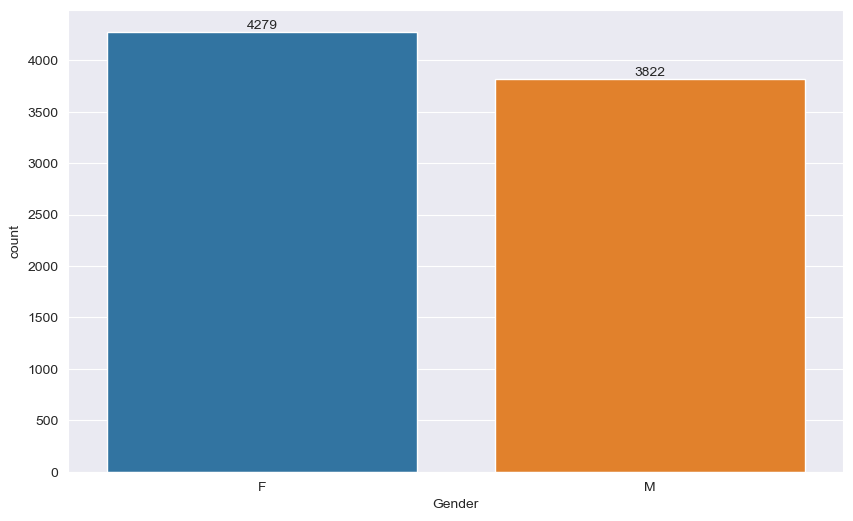

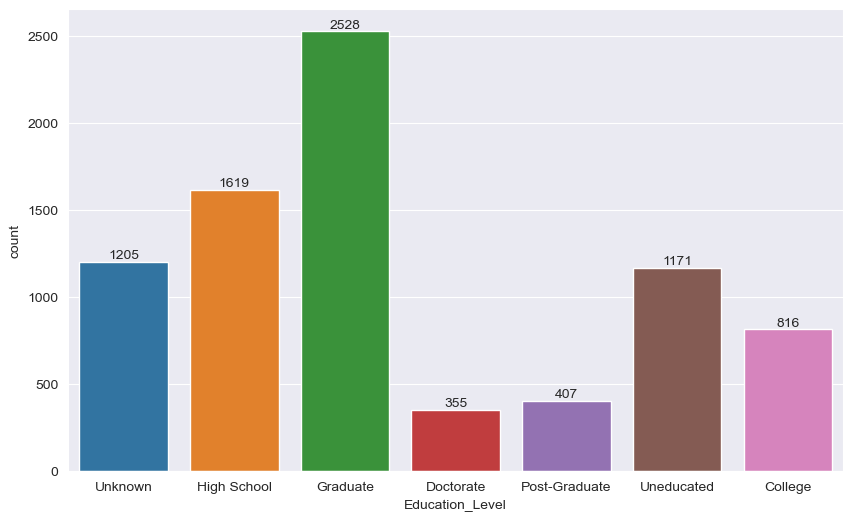

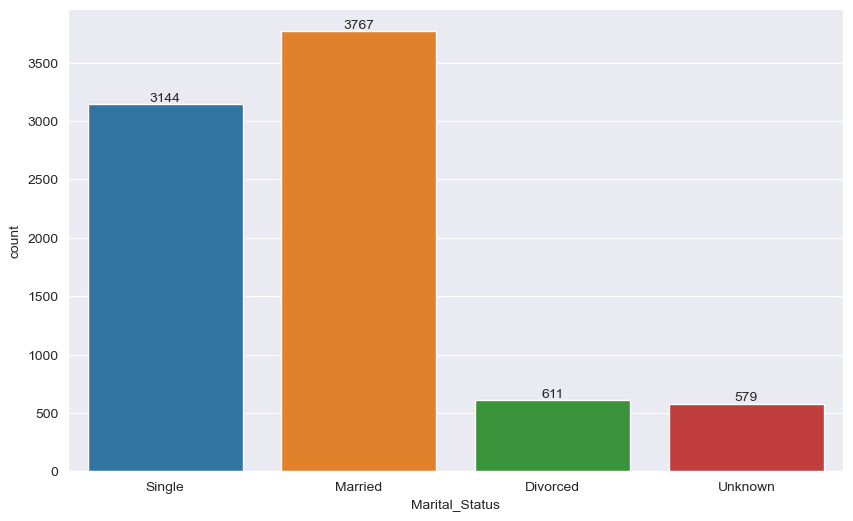

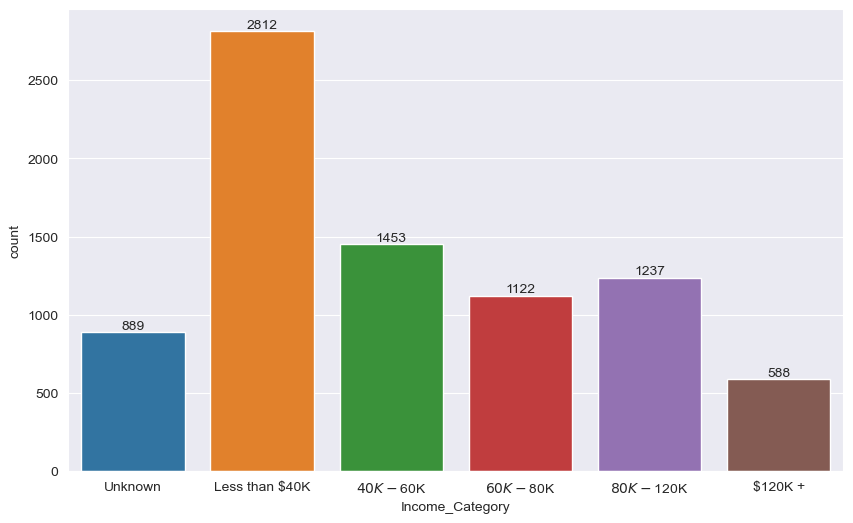

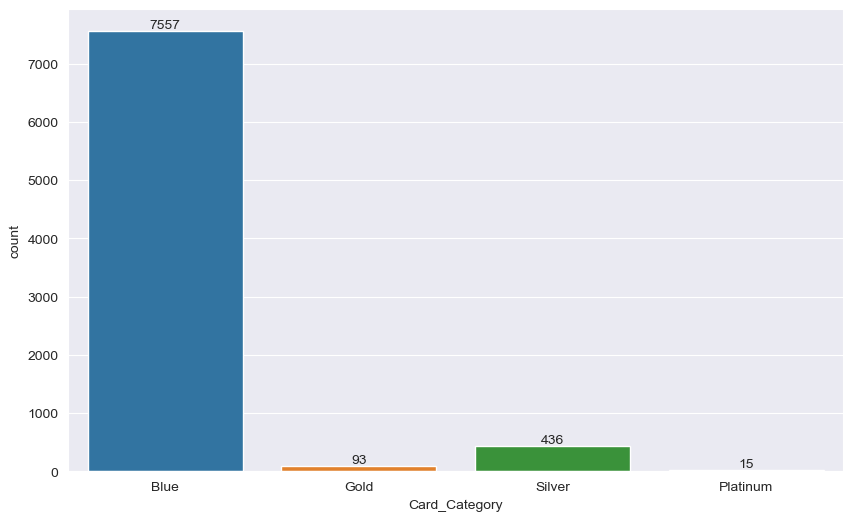

In [13]:
''' distribución gráfica de las variables categóricas'''

categorical_cols = [cname for cname in train.columns if train[cname].dtype == "object"]
for c in categorical_cols:
        plt.figure(figsize= (10,6))
        ax = sns.countplot(data = train, x = c)
        for container in ax.containers:
            ax.bar_label(container)
        plt.show()

In [3]:
train['Card_Category'] = train['Card_Category'].apply(lambda x: 0 if x == 'Blue' else 1) # 0 si es Blue 1 en caso contrario
test['Card_Category'] = test['Card_Category'].apply(lambda x: 0 if x == 'Blue' else 1)
train['Gender'] = train['Gender'].apply(lambda x: 0 if x == 'M' else 1) # 0 es M , 1 es F
test['Gender'] = test['Gender'].apply(lambda x: 0 if x == 'M' else 1)

In [4]:
categorical_cols = [cname for cname in train.columns if train[cname].dtype == "object"]
categorical_cols

['Education_Level', 'Marital_Status', 'Income_Category']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_cols:
    train[i] = le.fit_transform(train[i])
    test[i] = le.transform(test[i])

# Balanceo de la Target

In [6]:
X = train.copy()
y = X.pop("Attrition_Flag")

In [7]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)

In [8]:
# summarize the new class distribution
y.value_counts()

1    6801
0    6801
Name: Attrition_Flag, dtype: int64

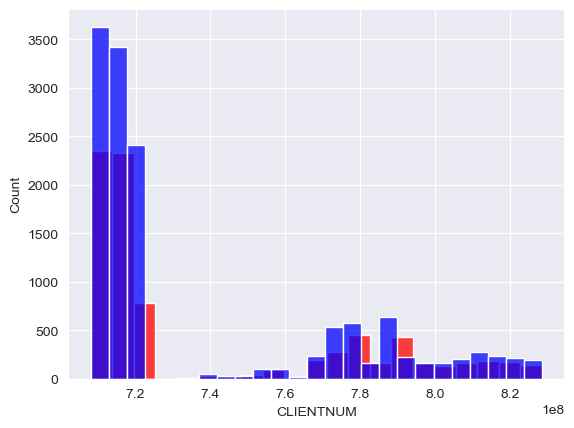

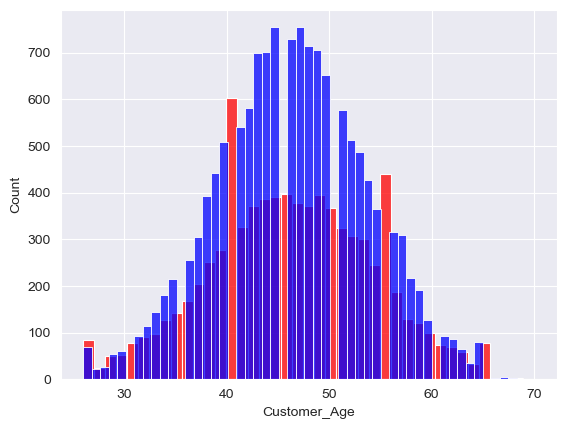

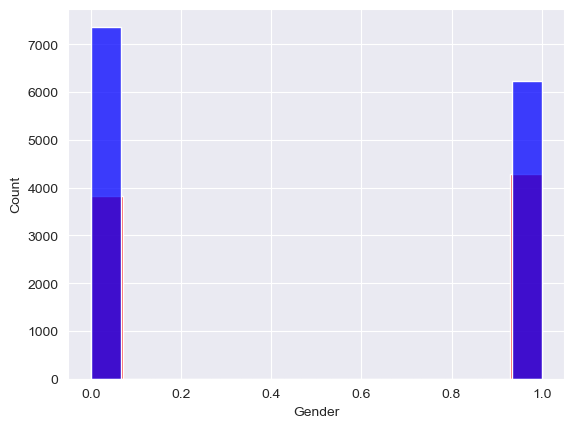

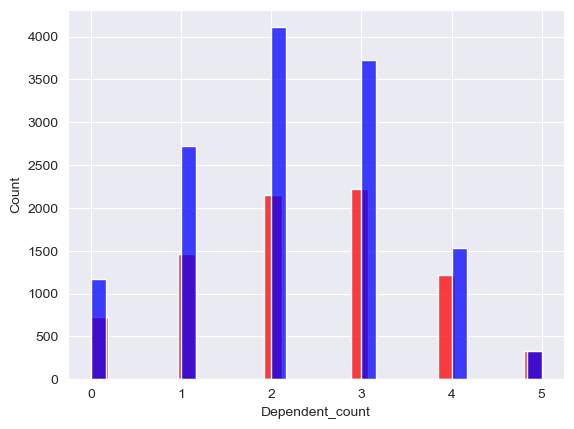

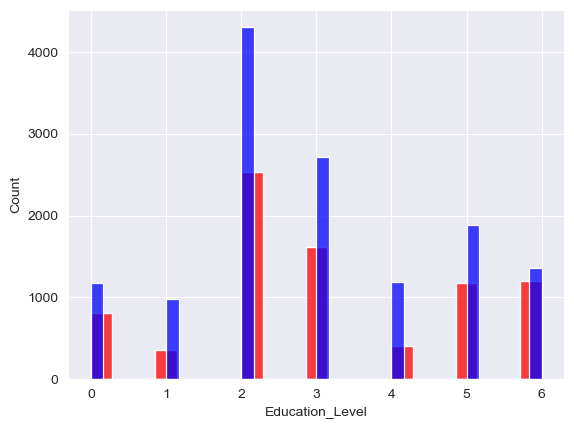

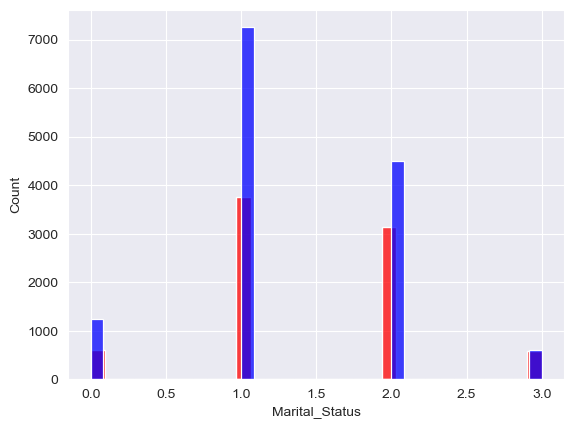

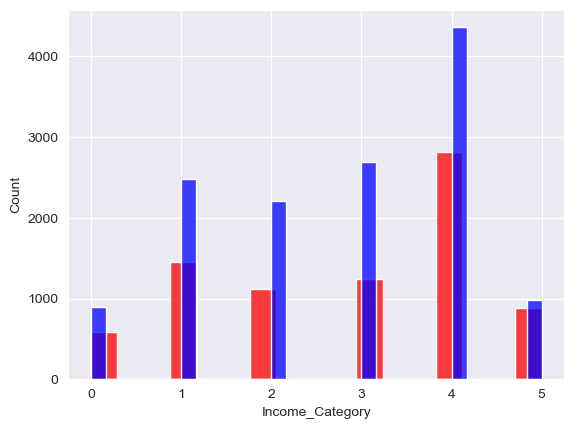

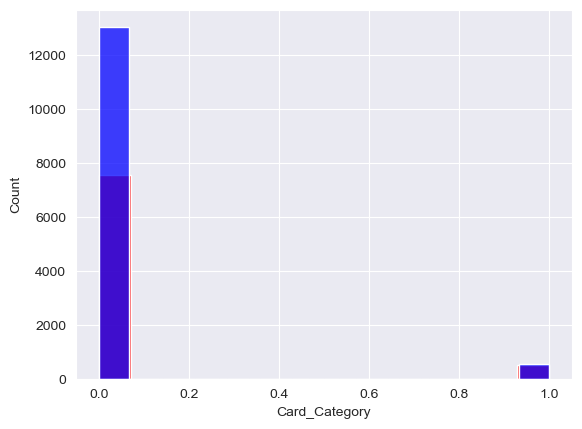

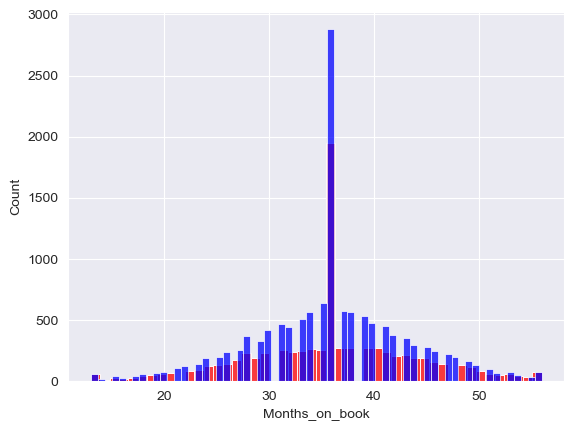

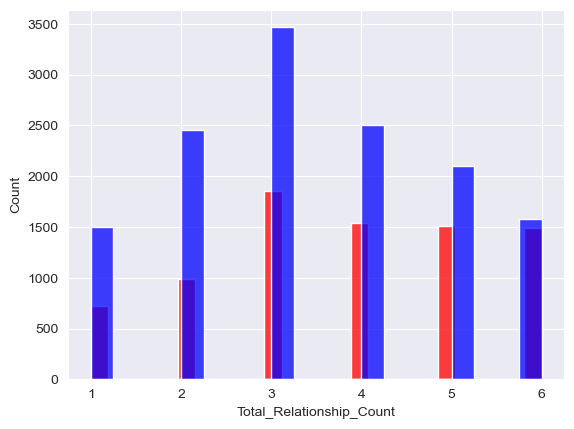

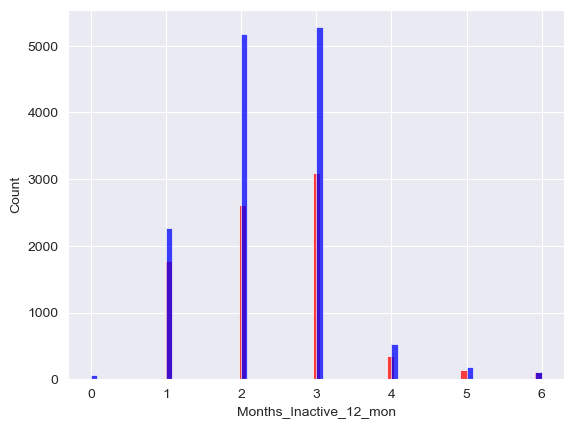

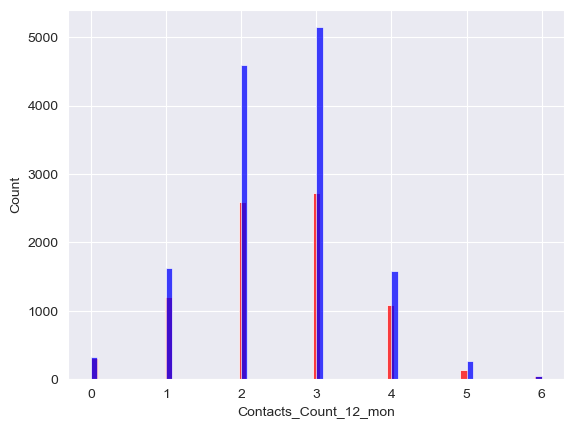

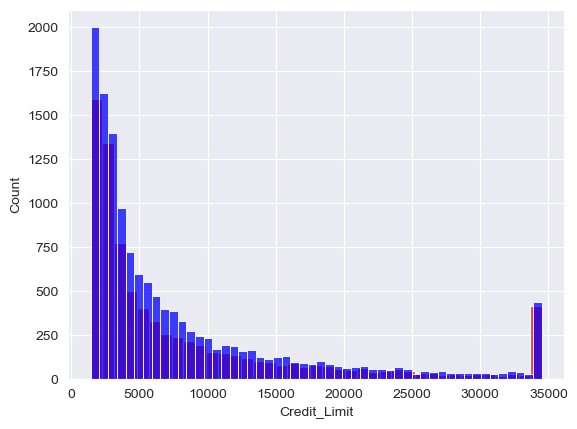

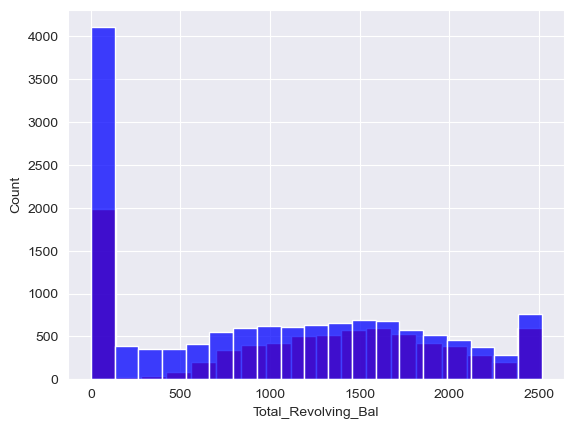

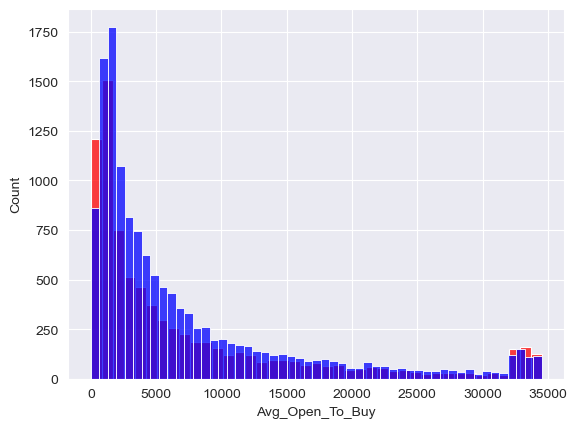

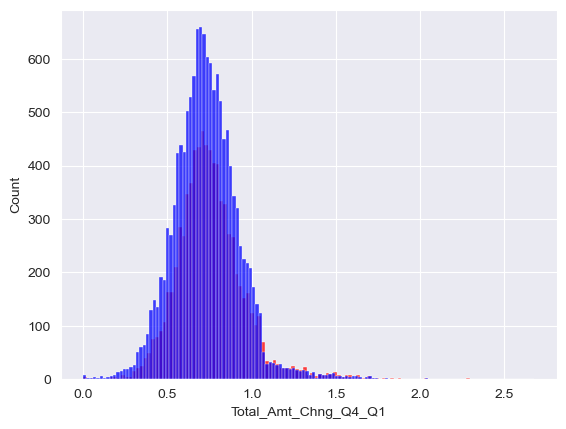

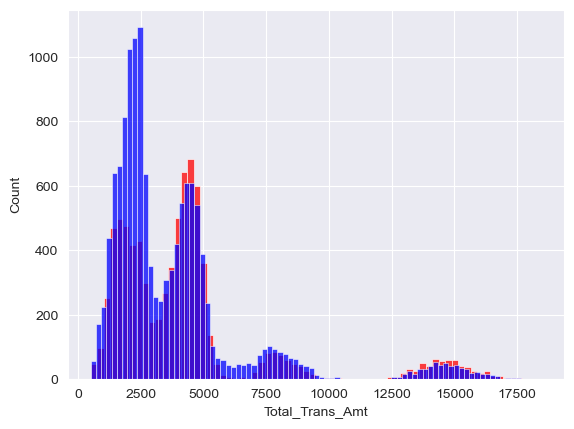

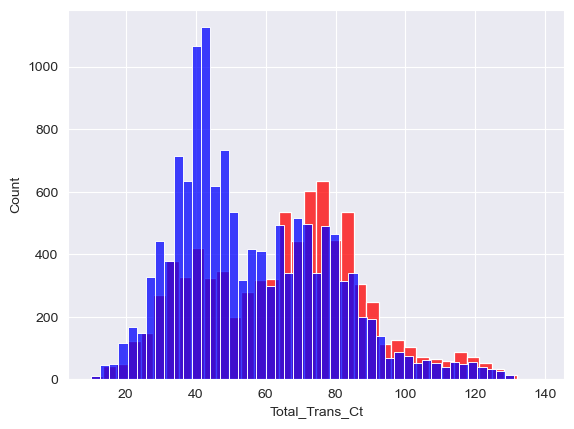

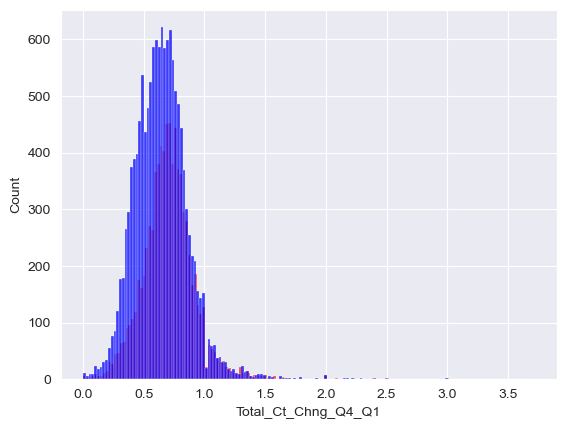

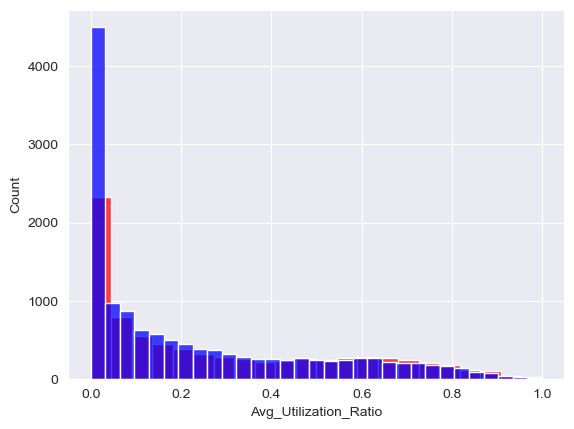

In [24]:
for i in X.columns:
    ax = sns.histplot(data = train, x = i, color = 'r')
    ax = sns.histplot(data = X, x = i, color= 'b')
    plt.show()

In [9]:
print(f'categorical cols : {categorical_cols}')

categorical cols : ['Education_Level', 'Marital_Status', 'Income_Category']


In [10]:
numerical_cols = list(set(X.columns)-set(categorical_cols))
print(f'numerical cols : {numerical_cols}')

numerical cols : ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Months_on_book', 'CLIENTNUM', 'Customer_Age', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Avg_Open_To_Buy', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Relationship_Count', 'Card_Category', 'Dependent_count']


In [11]:
from sklearn.preprocessing import PowerTransformer

yeo = PowerTransformer()
yeocols = ['Avg_Open_To_Buy','Avg_Utilization_Ratio']

X[yeocols] = pd.DataFrame(yeo.fit_transform(X[yeocols]))

In [12]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

yeo = PowerTransformer(standardize=True)
sc = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False, drop = 'first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num',sc, numerical_cols), # estandarizamos las continuas
        ('cat',categorical_transformer, categorical_cols) # pasamos a dummies las categóricas
    ])

In [13]:
''' eliminamos los prefijos num y cat para los nombres de las columnas'''
preprocessor.fit(X)
names = []
for i in preprocessor.get_feature_names_out():
    names.append(i[5:])

In [14]:
Xtrain = pd.DataFrame(preprocessor.fit_transform(X))
Xtrain.columns = names
#Xtrain.drop(['CLIENTNUM'], axis = 1, inplace= True)

In [15]:
Xtrain

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Months_on_book,Customer_Age,Total_Trans_Ct,Months_Inactive_12_mon,...,Education_Level_5,Education_Level_6,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income_Category_1,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_5
0,1.603238,-0.681381,1.140471,1.086994,0.928472,0.128812,0.014275,1.034617,1.923524,0.693181,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.581815,-1.180142,0.797942,1.086994,1.019114,-1.084445,1.622345,1.577808,-0.779745,1.779806,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.809234,-0.011476,-0.276339,1.086994,0.831787,2.563840,0.014275,-0.187563,-0.914909,-1.480069,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.409302,2.071584,1.520013,1.086994,1.882026,2.776693,0.014275,-1.681338,-0.464364,0.693181,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.005981,-0.647152,1.536934,1.086994,1.167767,0.622629,0.416293,0.355628,0.211453,0.693181,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13597,-0.535044,-0.368136,0.653247,-0.919968,0.037762,-0.383556,0.416293,-0.187563,-0.239092,-0.393444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13598,-1.004456,-0.740216,-1.115622,1.086994,-1.159922,-1.629735,1.622345,1.577808,-1.680835,-0.393444,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13599,0.972837,0.933342,0.657895,1.086994,0.300020,0.921980,0.014275,0.898819,0.481780,0.693181,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13600,-0.347957,0.952575,-0.231023,1.086994,-0.572561,-0.603658,-0.387742,0.084032,-0.554473,-0.393444,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = []

models.append(('LR', LogisticRegression(random_state=99)))
models.append(('Dectree', DecisionTreeClassifier(random_state=99)))
models.append(('Bagging', BaggingClassifier(random_state=99)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=99)))
models.append(('XGBoost', XGBClassifier()))
models.append(('RFC', RandomForestClassifier(random_state=99)))
models.append(('SVC', SVC(random_state=99)))


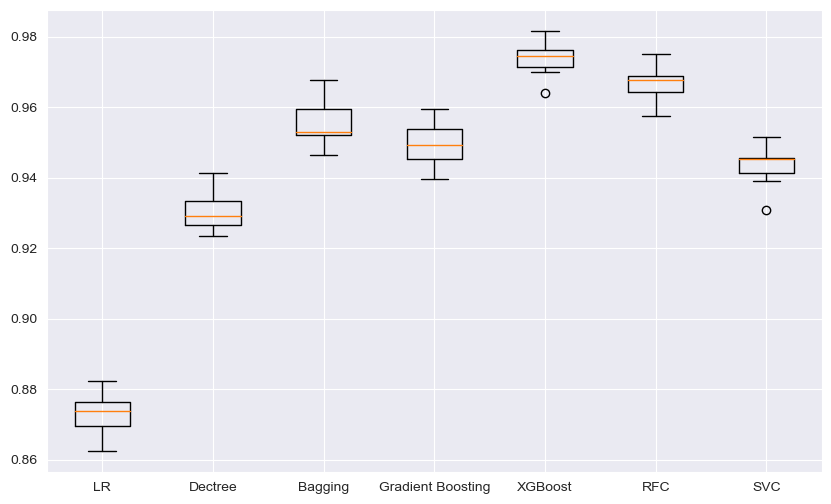

In [38]:
results = []
names = []
for name,model in models:
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    acc = cross_val_score(model, Xtrain,y, cv = kf)
    names.append(name)
    results.append(acc)

plt.figure(figsize=(10,6))
plt.boxplot(results)
plt.xticks(range(1,len(names)+1),names)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xtrain,y,test_size= 0.33)

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

from sklearn.metrics import classification_report

print(classification_report(ytest, xgb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2295
           1       0.97      0.97      0.97      2194

    accuracy                           0.97      4489
   macro avg       0.97      0.97      0.97      4489
weighted avg       0.97      0.97      0.97      4489



In [26]:
rf = RandomForestClassifier(random_state=99)
xgb = XGBClassifier()
gb = GradientBoostingClassifier(random_state=99)
bag = BaggingClassifier(random_state=99)
rf.fit(Xtrain,y)
xgb.fit(Xtrain,y)
gb.fit(Xtrain,y)

GradientBoostingClassifier(random_state=99)

In [27]:
df = pd.DataFrame(zip(Xtrain.columns,rf.feature_importances_), columns = ['features','rf'] )
df2 = pd.DataFrame(zip(Xtrain.columns,xgb.feature_importances_), columns = ['features','xgb'] )
df3 = pd.DataFrame(zip(Xtrain.columns,gb.feature_importances_), columns = ['features','gb'])
df = df.merge(df2, left_on= 'features', right_on='features')
df = df.merge(df3, left_on= 'features', right_on='features')
df.sort_values(by = ['gb','xgb','rf'], ascending= False)

,features,rf,xgb,gb
8,Total_Trans_Ct,0.253208,0.291421,0.569009
0,Total_Trans_Amt,0.168335,0.064781,0.141781
13,Total_Relationship_Count,0.068207,0.117685,0.086611
4,Total_Revolving_Bal,0.091445,0.082885,0.080395
5,Total_Ct_Chng_Q4_Q1,0.102939,0.042197,0.059677
1,Total_Amt_Chng_Q4_Q1,0.051154,0.025695,0.026162
7,Customer_Age,0.030760,0.030243,0.013014
9,Months_Inactive_12_mon,0.021535,0.028888,0.008004
11,Contacts_Count_12_mon,0.019335,0.024387,0.004524
2,Avg_Utilization_Ratio,0.038808,0.020246,0.004250


In [32]:
features = []
for feat in df.features:
    features.append(float(mean(df[ df['features'] == feat ].iloc[:,1:],axis=1) ) )
    #features[feat] = float(mean(df[ df['features'] == feat ].iloc[:,1:],axis=1) )
df = pd.DataFrame(zip(df.features,features) )
df.columns = ['features','mean']
df.sort_values('mean',ascending = False,inplace=True)
df

,features,mean
0,Total_Trans_Ct,0.371213
1,Total_Trans_Amt,0.124965
2,Total_Relationship_Count,0.090834
3,Total_Revolving_Bal,0.084908
4,Total_Ct_Chng_Q4_Q1,0.068271
5,Total_Amt_Chng_Q4_Q1,0.034337
6,Customer_Age,0.024672
7,Avg_Utilization_Ratio,0.021101
8,Months_Inactive_12_mon,0.019476
9,Credit_Limit,0.016748


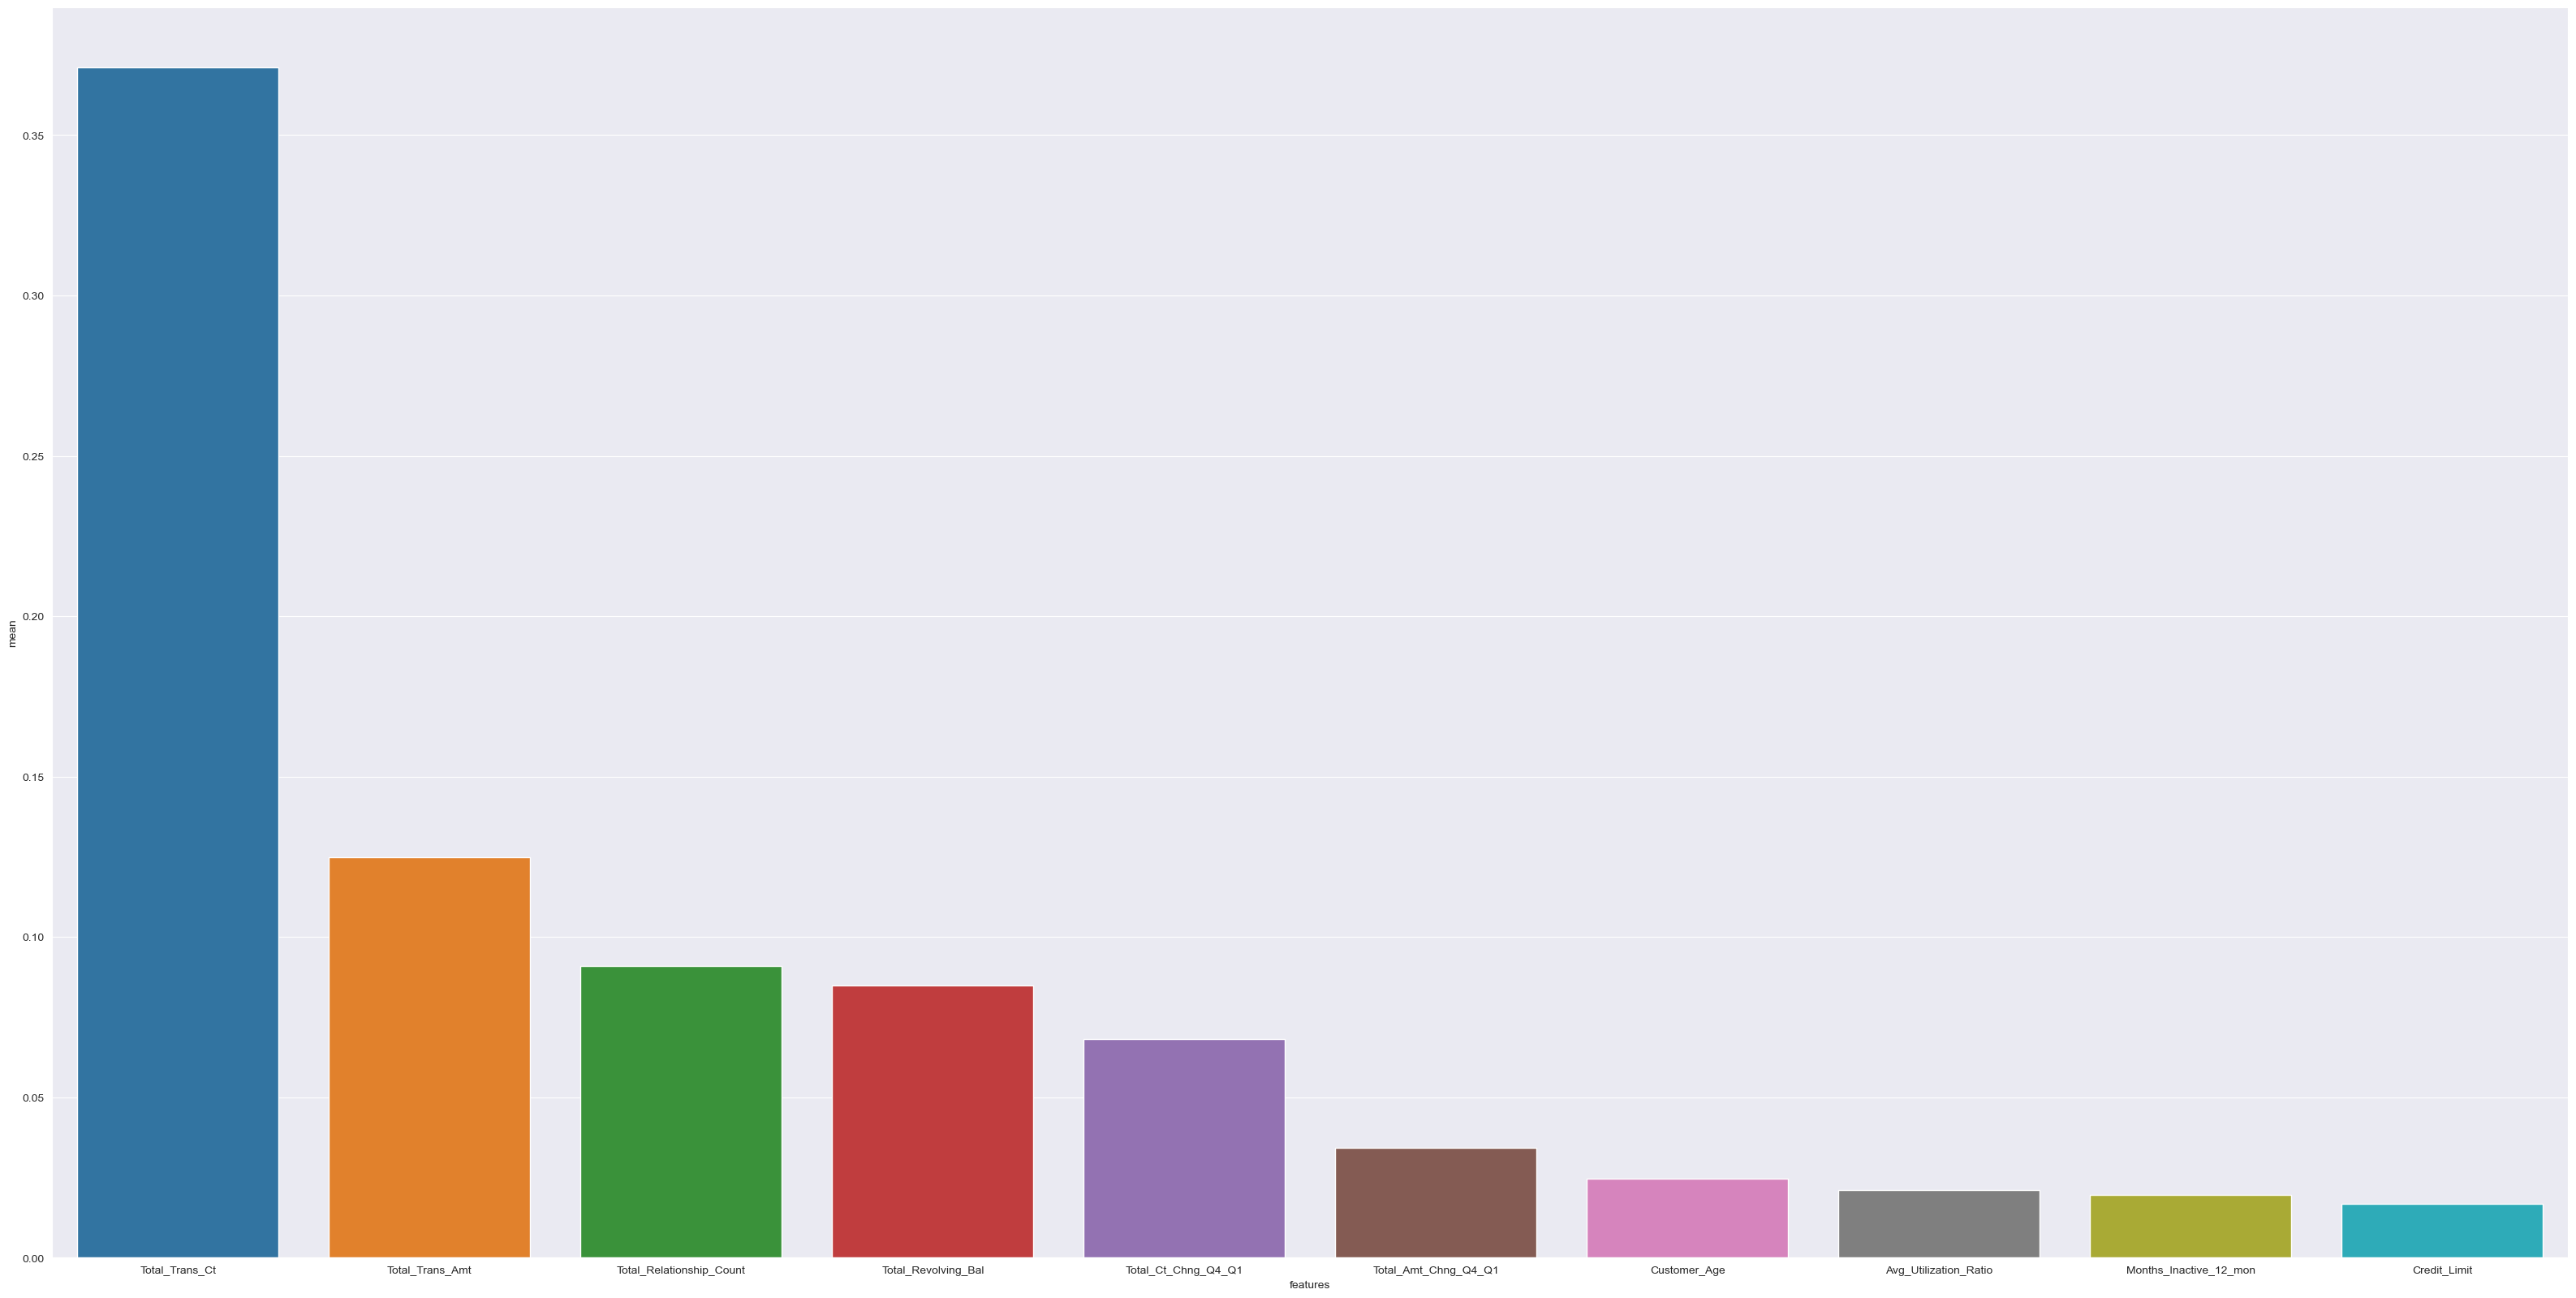

In [34]:
''' plot importancia variables'''
plt.figure(figsize=(40,20))
# cogemos sólo las más relevantes para que se vea el gráfico
sns.barplot(data = df.iloc[:10,:], x = 'features', y = 'mean' )
plt.show()